In [53]:
'''
Girish Rajani-Bathija
A20503736
CS 577 - F22
Assignment 5 Reuters Classification
'''

from keras.datasets import reuters
from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM
import matplotlib.pyplot as plt
import os
import numpy as np

In [54]:
max_features = 10000 #number of words to consider as features
maxlen = 20 #cuts of text after 20 words 

#load the data as list of integers
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=max_features)

train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

#one hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [55]:
#Create validation set from training data
x_val = train_data[:2246]
partial_train_data = train_data[2246:]
y_val = one_hot_train_labels[:2246]
partial_train_labels = one_hot_train_labels[2246:]

In [56]:
print('Training data samples:',len(partial_train_data))
print('Validation data samples:',len(x_val))
print('Testing data samples:',len(test_data))

Training data samples: 6736
Validation data samples: 2246
Testing data samples: 2246


In [57]:
#Build the network using the pretrained embedding layer
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(46, activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 flatten_3 (Flatten)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                128064    
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,131,054
Trainable params: 1,131,054
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
211/211 [==============================] - 2s 6ms/step - loss: 2.1238 - acc: 0.4633 - val_loss: 1.9478 - val_acc: 0.4786
Epoch 2/10
211/211 [==============================] - 1s 5ms/step - loss: 1.6238 - acc: 0.5922 - val_loss: 1.7783 - val_acc: 0.5583
Epoch 3/10
211/211 [==============================] - 1s 5ms/step - loss: 1.2955 - acc: 0.6879 - val_loss: 1.7346 - val_acc: 0.5797
Epoch 4/10
211/211 [==============================] - 1s 5ms/step - loss: 0.9817 - acc: 0.7592 - val_loss: 1.7497 - val_acc: 0.5748
Epoch 5/10
211/211 [==============================] - 1s 5ms/step - loss: 0.7070 - acc: 0.8293 - val_loss: 1.8338 - val_acc: 0.5748
Epoch 6/10
211/211 [==============================] - 1s 4ms/step - loss: 0.4819 - acc: 0.8897 - val_loss: 1.9673 - val_acc: 0.5708
Epoch 7/10
211/211 [==============================] - 1s 5ms/step - loss: 0.3139 - acc: 0.9360 - val_loss: 2.0786 - val_acc: 0.5744
Epoch 8/10
211/211 [==============================] - 1s 5ms/step - loss: 0.

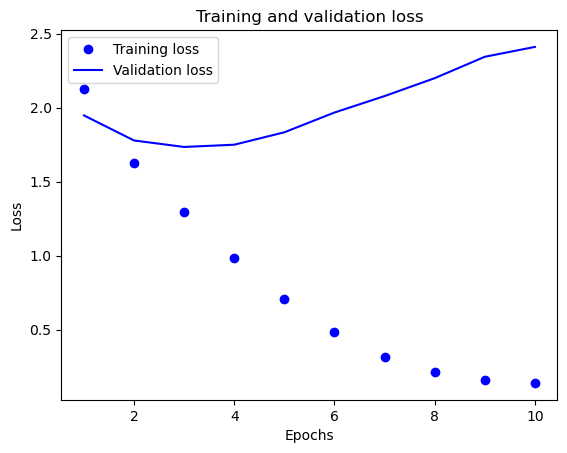

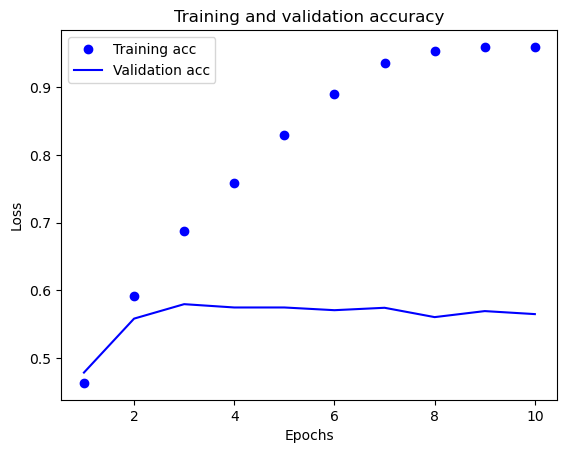

In [59]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
#Evaluate accuracy of model on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.458040714263916
Test accuracy: 0.5569902062416077


In [61]:
# Parsing the GloVe word-embeddings file

glove_dir = 'D:/Users/giris/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [63]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
max_words=10000
word_index = reuters.get_word_index()

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

550378/550378 [==============================] - 0s 0us/step


In [64]:
#Build the network using the trainable embedding layer
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(46, activation='sigmoid'))

#Loading pretrained word embeddings into the Embedding layer and freeze the weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 flatten_4 (Flatten)         (None, 2000)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                128064    
                                                                 
 dense_9 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,131,054
Trainable params: 131,054
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [65]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
211/211 [==============================] - 1s 5ms/step - loss: 2.2984 - acc: 0.4008 - val_loss: 2.1722 - val_acc: 0.4141
Epoch 2/10
211/211 [==============================] - 1s 4ms/step - loss: 1.9526 - acc: 0.4702 - val_loss: 2.1271 - val_acc: 0.4564
Epoch 3/10
211/211 [==============================] - 1s 4ms/step - loss: 1.7229 - acc: 0.5193 - val_loss: 2.1147 - val_acc: 0.4510
Epoch 4/10
211/211 [==============================] - 1s 4ms/step - loss: 1.5136 - acc: 0.5698 - val_loss: 2.2189 - val_acc: 0.4559
Epoch 5/10
211/211 [==============================] - 1s 4ms/step - loss: 1.3087 - acc: 0.6260 - val_loss: 2.4308 - val_acc: 0.4581
Epoch 6/10
211/211 [==============================] - 1s 4ms/step - loss: 1.0967 - acc: 0.6796 - val_loss: 2.3711 - val_acc: 0.4599
Epoch 7/10
211/211 [==============================] - 1s 4ms/step - loss: 0.9042 - acc: 0.7398 - val_loss: 2.5609 - val_acc: 0.4399
Epoch 8/10
211/211 [==============================] - 1s 4ms/step - loss: 0.

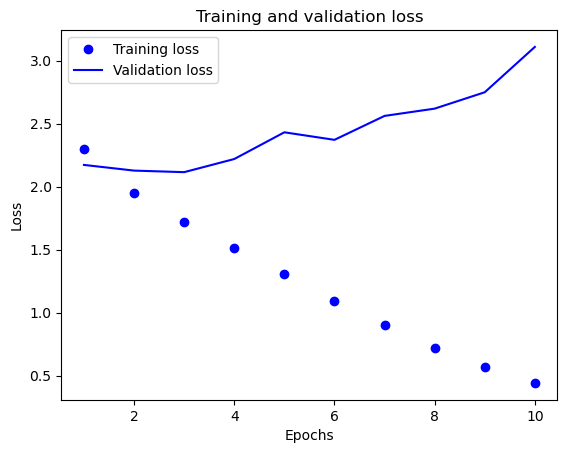

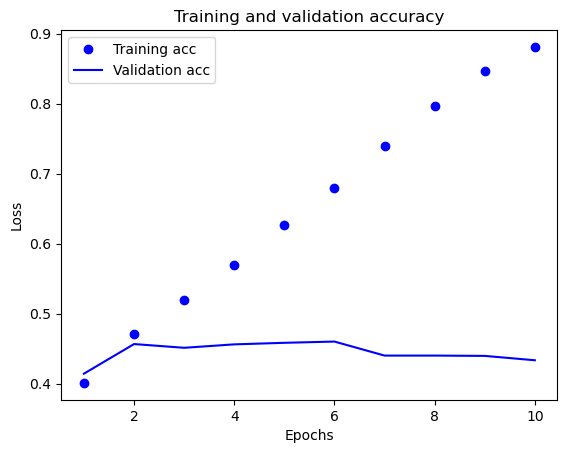

In [66]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
#Evaluate accuracy of model on test data
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 3.1166772842407227
Test accuracy: 0.4336598515510559


In [72]:
#Training by now replacing the fully connected layer with an LSTM layer
#Use the same model as before
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
#Change the fully connected layer to a LSTM layer:
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(46, activation='sigmoid'))

#Loading pretrained word embeddings into the Embedding layer and freeze the weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            42240     
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 46)                58926     
                                                                 
Total params: 1,101,166
Trainable params: 101,166
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [73]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
211/211 [==============================] - 5s 13ms/step - loss: 2.2031 - acc: 0.4273 - val_loss: 2.1794 - val_acc: 0.4426
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 1.9353 - acc: 0.4780 - val_loss: 2.1551 - val_acc: 0.4622
Epoch 3/10
211/211 [==============================] - 2s 8ms/step - loss: 1.7650 - acc: 0.5125 - val_loss: 2.0094 - val_acc: 0.4751
Epoch 4/10
211/211 [==============================] - 2s 8ms/step - loss: 1.6197 - acc: 0.5433 - val_loss: 1.9987 - val_acc: 0.4804
Epoch 5/10
211/211 [==============================] - 2s 8ms/step - loss: 1.4801 - acc: 0.5762 - val_loss: 1.9609 - val_acc: 0.4955
Epoch 6/10
211/211 [==============================] - 2s 8ms/step - loss: 1.3476 - acc: 0.6142 - val_loss: 1.9675 - val_acc: 0.4973
Epoch 7/10
211/211 [==============================] - 2s 8ms/step - loss: 1.2190 - acc: 0.6456 - val_loss: 1.9747 - val_acc: 0.5022
Epoch 8/10
211/211 [==============================] - 2s 9ms/step - loss: 1

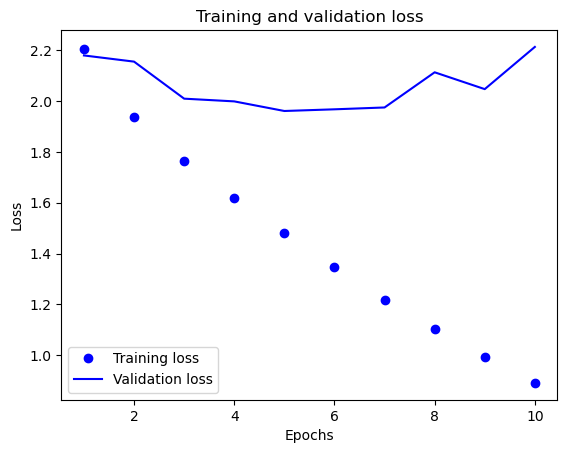

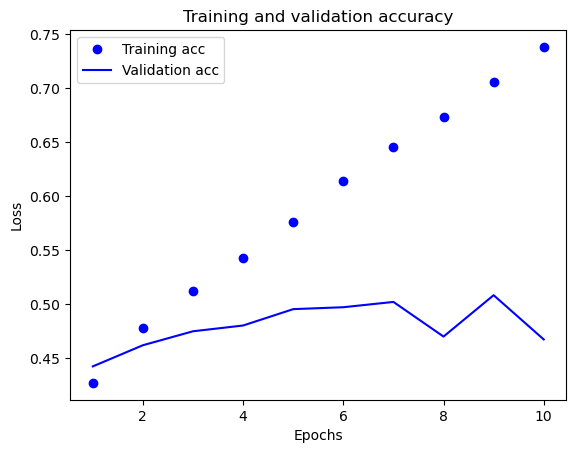

In [74]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
#Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.195302963256836
Test accuracy: 0.46660730242729187


In [76]:
#Training by now replacing the fully connected layer with 2 LSTM layers
#Use the same model as before
model = Sequential()
model.add(Embedding(10000, 100, input_length=maxlen))
#Add a total of 2 LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(46, activation='sigmoid'))

#Loading pretrained word embeddings into the Embedding layer and freeze the weights
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 lstm_2 (LSTM)               (None, 20, 64)            42240     
                                                                 
 lstm_3 (LSTM)               (None, 20, 128)           98816     
                                                                 
 flatten_7 (Flatten)         (None, 2560)              0         
                                                                 
 dense_12 (Dense)            (None, 46)                117806    
                                                                 
Total params: 1,258,862
Trainable params: 258,862
Non-trainable params: 1,000,000
_________________________________________________________________
None


In [77]:
#Compile and train the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(partial_train_data, partial_train_labels,
epochs=10, batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
211/211 [==============================] - 6s 17ms/step - loss: 2.2088 - acc: 0.4299 - val_loss: 2.1359 - val_acc: 0.4484
Epoch 2/10
211/211 [==============================] - 3s 13ms/step - loss: 1.9907 - acc: 0.4718 - val_loss: 2.0641 - val_acc: 0.4604
Epoch 3/10
211/211 [==============================] - 3s 13ms/step - loss: 1.8572 - acc: 0.5056 - val_loss: 1.9980 - val_acc: 0.4809
Epoch 4/10
211/211 [==============================] - 3s 12ms/step - loss: 1.7314 - acc: 0.5251 - val_loss: 2.0491 - val_acc: 0.4533
Epoch 5/10
211/211 [==============================] - 3s 12ms/step - loss: 1.6086 - acc: 0.5549 - val_loss: 2.1164 - val_acc: 0.4488
Epoch 6/10
211/211 [==============================] - 3s 13ms/step - loss: 1.4894 - acc: 0.5854 - val_loss: 2.0125 - val_acc: 0.4777
Epoch 7/10
211/211 [==============================] - 3s 13ms/step - loss: 1.3569 - acc: 0.6076 - val_loss: 2.0258 - val_acc: 0.4929
Epoch 8/10
211/211 [==============================] - 3s 13ms/step - 

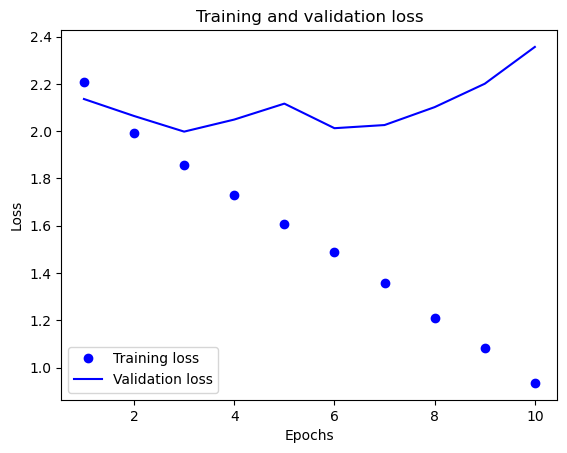

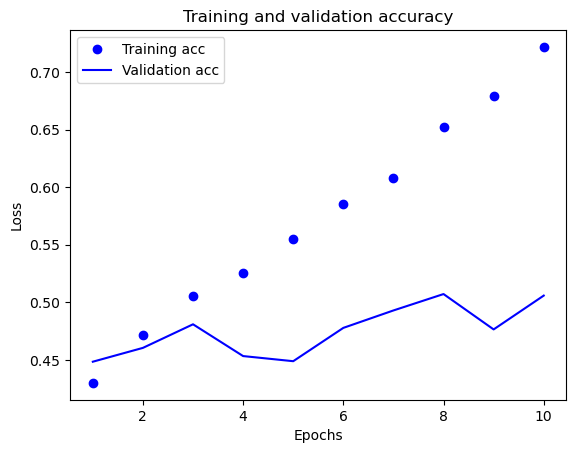

In [78]:
#Plot training and validation loss graph as a function of epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
#Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.3712334632873535
Test accuracy: 0.5102404356002808
